# TASK 1
Create a bar chart or histogram to visualize the distribution of a categorical or continuous variable (population)

Dataset used:
World Bank – Total Population

Link: https://data.worldbank.org/indicator/SP.POP.TOTL

### Step 1: Import required libraries

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

### Step 2: Load downloaded dataset

In [32]:
# Read CSV (actual data starts from row 4)
population_df = pd.read_csv("E:\Ray's Stuff\Job_Internsip_stuff\Internships\Winter 2025\SkillCraft Technology\Task_1\pop_dataset_edited.csv", skiprows=4)

population_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,India,IND,"Population, total",SP.POP.TOTL,435990338.0,446564729.0,457283090.0,468138575.0,479229598.0,490140146.0,...,1.328024e+09,1.343944e+09,1.359657e+09,1.374659e+09,1.389030e+09,1.402618e+09,1.414204e+09,1.425423e+09,1.438070e+09,1.450936e+09
1,China,CHN,"Population, total",SP.POP.TOTL,667070000.0,660330000.0,665770000.0,682335000.0,698355000.0,715185000.0,...,1.379860e+09,1.387790e+09,1.396215e+09,1.402760e+09,1.407745e+09,1.411100e+09,1.412360e+09,1.412175e+09,1.410710e+09,1.408975e+09
2,United States,USA,"Population, total",SP.POP.TOTL,180671000.0,183691000.0,186538000.0,189242000.0,191889000.0,194303000.0,...,3.218151e+08,3.243533e+08,3.266086e+08,3.285296e+08,3.302262e+08,3.315777e+08,3.320998e+08,3.340173e+08,3.368062e+08,3.401110e+08
3,Indonesia,IDN,"Population, total",SP.POP.TOTL,88296070.0,90791249.0,93375850.0,96051424.0,98833749.0,101365130.0,...,2.617992e+08,2.646274e+08,2.673467e+08,2.699518e+08,2.724894e+08,2.748149e+08,2.767581e+08,2.788305e+08,2.811901e+08,2.834879e+08
4,Pakistan,PAK,"Population, total",SP.POP.TOTL,45709310.0,46921277.0,48156128.0,49447776.0,50799999.0,52209010.0,...,2.172909e+08,2.201389e+08,2.232740e+08,2.269289e+08,2.308009e+08,2.350017e+08,2.394778e+08,2.437007e+08,2.475045e+08,2.512692e+08


### Step 3: Inspect and Clean Data

In [33]:
# Check column names
population_df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', '2024'],
      dtype='object')

In [34]:
# Keep only relevant columns
population_df_24 = population_df[['Country Name', '2024']]

# Rename columns for clarity
population_df_24.columns = ['Country', 'Population']

# Remove missing values
population_df_24 = population_df_24.dropna()

population_df_24.head()

,Country,Population
0,India,1.450936e+09
1,China,1.408975e+09
2,United States,3.401110e+08
3,Indonesia,2.834879e+08
4,Pakistan,2.512692e+08


### Step 4: Create a Bar Chart: Top 10 most populated countries

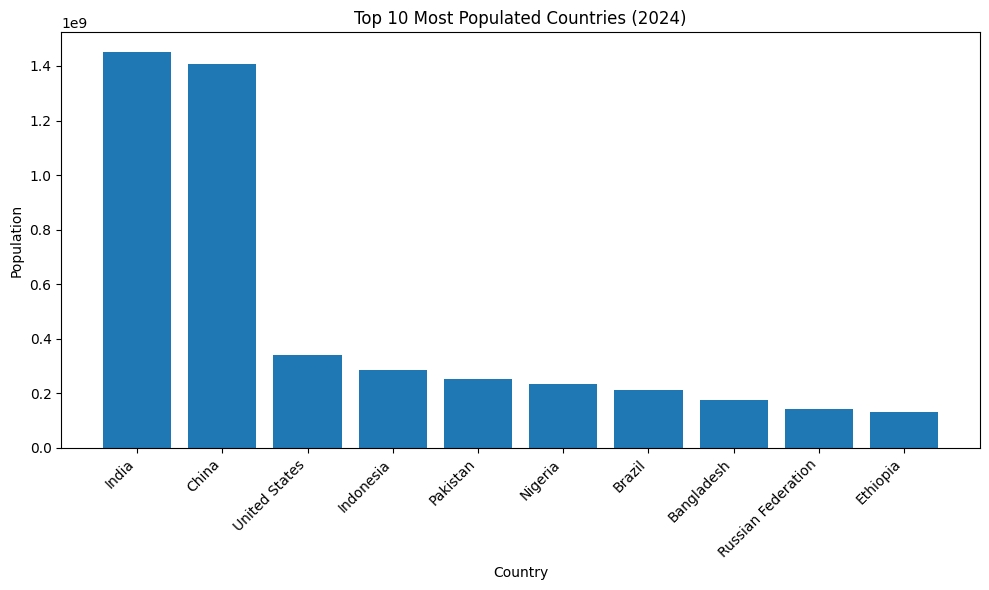

In [35]:
# Select top 10 countries by population
top_10 = population_df_24.sort_values(by='Population', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10['Country'], top_10['Population'])
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Most Populated Countries (2024)')
plt.xlabel('Country')
plt.ylabel('Population')
plt.tight_layout()
plt.show()


### Step 5: Creating a Area Chart with 3 Population Phases (India)

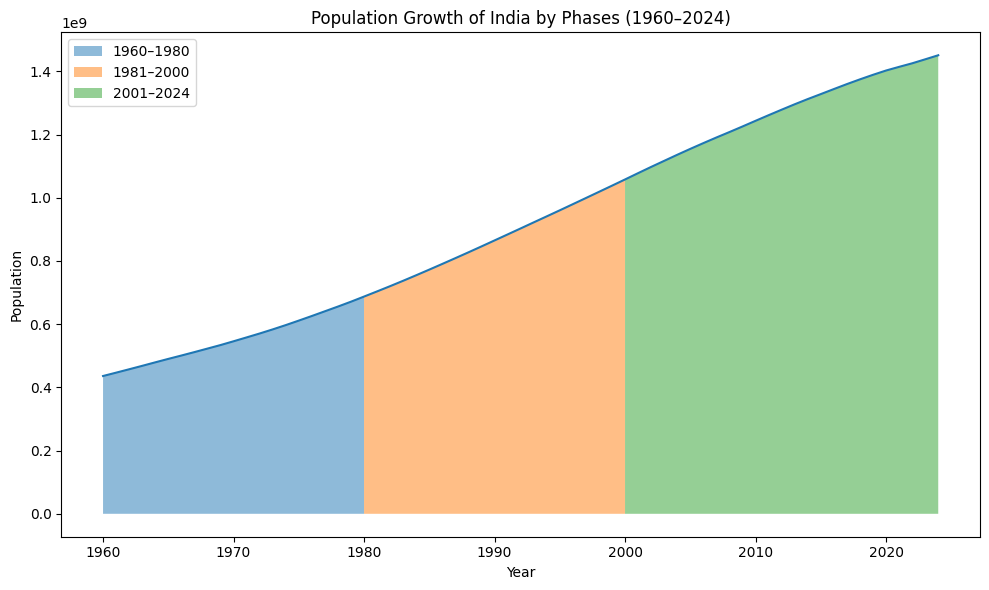

In [36]:
# Filter data for India
india_df = population_df[population_df['Country Name'] == 'India']

# Select year columns (1960–2024)
years = [str(year) for year in range(1960, 2025)]
india_series = india_df[years].T
india_series.columns = ['Population']

# Convert index to numeric year
india_series.index = india_series.index.astype(int)

# Plot base line
plt.figure(figsize=(10, 6))
plt.plot(india_series.index, india_series['Population'])

# Phase 1: 1960–1980
phase1 = india_series.loc[1960:1980]
plt.fill_between(
    phase1.index,
    phase1['Population'],
    alpha=0.5,
    label='1960–1980'
)

# Phase 2: 1981–2000
phase2 = india_series.loc[1980:2000]
plt.fill_between(
    phase2.index,
    phase2['Population'],
    alpha=0.5,
    label='1981–2000'
)

# Phase 3: 2001–2024
phase3 = india_series.loc[2000:2024]
plt.fill_between(
    phase3.index,
    phase3['Population'],
    alpha=0.5,
    label='2001–2024'
)

plt.title("Population Growth of India by Phases (1960–2024)")
plt.xlabel("Year")
plt.ylabel("Population")
plt.legend()
plt.tight_layout()
plt.show()

### Key Insights/Conclusions

India is among the most populous countries in the world

Population growth shows a steady upward trend

Growth accelerates after 1980

Area charts are effective for representing long-term cumulative data

Bar charts are effective for country-level comparisons